### Code to plot the most recent color telemetry profile
#### 12/28/2019 CJH

In [6]:
import sys
import time
from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ip = '172.22.11.2'
ip = 'roboRIO-2429-FRC.local'
NetworkTables.initialize(server=ip)

False

In [3]:
def valueChanged(table, key, value, isNew):
    print("valueChanged: key: '%s'; value: %s; isNew: %s" % (key, value, isNew))
def connectionListener(connected, info):
    print(info, "; Connected=%s" % connected)

In [4]:
NetworkTables.addConnectionListener(connectionListener, immediateNotify=True)

In [5]:
sd = NetworkTables.getTable("SmartDashboard")

In [6]:
def get_data():
    # this was a lot simpler but stupid network tables can only take 256 values per array
    data_time = np.array(sd.getNumberArray('color_telemetry_time',0))
    data_color = np.array(sd.getStringArray('color_telemetry_color',0))
    data = np.column_stack((data_time,data_color))
    df = pd.DataFrame(data, columns =['time','color'])
    return df

ConnectionInfo(remote_id='Robot', remote_ip='roboRIO-2429-FRC.local', remote_port=1735, last_update=0, protocol_version=768) ; Connected=True


In [26]:
get_data()

,time,color
0,0.00706400000000329,No Match
1,0.022087000000002632,No Match
2,0.04186700000000343,No Match
3,0.061863000000002444,No Match
4,0.08258400000000066,No Match
...,...,...
229,4.582524000000003,No Match
230,4.6032290000000025,No Match
231,4.622624000000002,No Match
232,4.6422750000000015,No Match


In [9]:
def plot_df(df):
# multiple line plot
    save = False
    markersize = 3
    linewidth = 1.2
    colors=['blue', 'orange', 'green', 'red']
    label = "Mapping Smart Motion Profile on SparkMax"
    plt.figure(num=None, figsize=(10,6),dpi=100)
    for i in range(3):
        plt.plot( 'time', df.columns[i+1], data=df, marker='o', markerfacecolor=colors[i], markersize=markersize, color=colors[i], linewidth=1)
    #plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.ylim(-1.1,1.1)
    plt.title(label)
    plt.xlabel('time (s)')
    plt.ylabel('inches, rpm/10, amps')
    if save:
        plt.ioff()
        plt.savefig(fname)
        plt.close()
    plt.show()

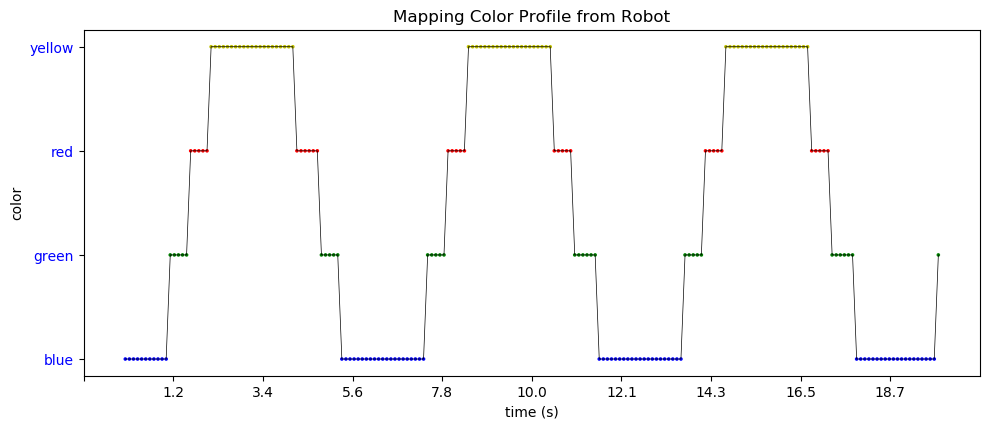

In [88]:
def plot_df2(df):
    # Make two dual-axis plots with the relevant information
    save = False
    markersize = 4
    linewidth = 1.2
    colors=['orange', 'blue', 'green', 'red','orange']
    label = "Mapping Color Profile from Robot"

    fig, ax1 = plt.subplots(figsize=(10,8),dpi=100)
    ax1=plt.subplot(211)
    index = 1
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel(df.columns[index])
    ax1.plot('time', df.columns[index], data=df, color='black', linewidth=0.5)
    ax1.scatter('time', df.columns[index], data=df, s=10, c=[color[0] for color in data_color], marker='.')
    
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, (end-start)/10))
    #ax1.set_xticks(ax1.get_xticks()[::20])
    ax1.tick_params(axis='y', labelcolor=colors[index])
    plt.title(label)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.ioff()
        plt.savefig(fname)
        plt.close()
    plt.show()


In [ ]:
get_data()
plot_df2(df)

In [ ]:
df.plot()

In [ ]:
df.diff().describe()

In [50]:
# fixing the plots - playing around a bit
import math
colors = ['blue', 'green', 'red', 'yellow']
data_time = np.array([i/10 for i in range(200)])
data_color = np.array([colors[int(4*math.sin(i/20)**2)] for i in range(200)])
data = np.column_stack((data_time,data_color))
df = pd.DataFrame(data, columns =['time','color'])

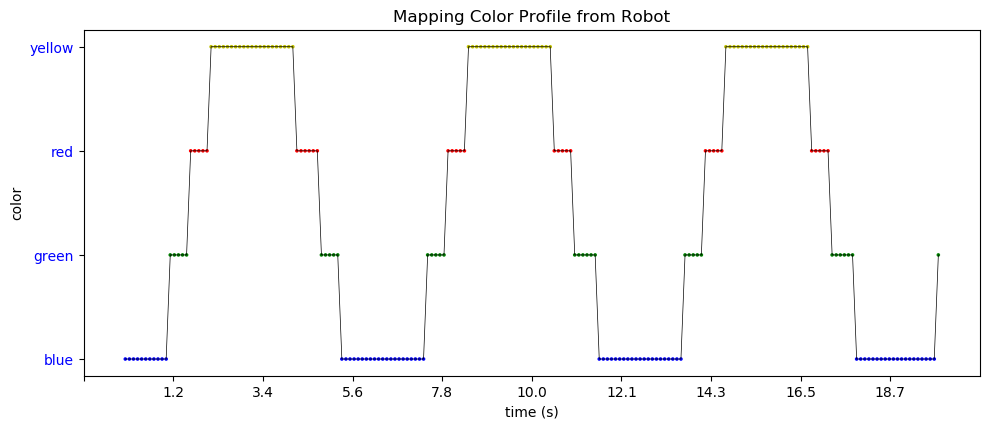

In [90]:
plot_df2(df)